In [194]:
import numpy as np
import glob
from nilearn.maskers import NiftiMasker
from scipy import stats, io
import warnings
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from nilearn._utils.param_validation import check_threshold
from nilearn.image import threshold_img
from nilearn import plotting
from sklearn.metrics import accuracy_score

In [195]:
imgs = sorted(glob.glob('subj01/spmT*.img'))
visu = io.loadmat('visual_stimuli.mat')
warnings.filterwarnings("ignore")
labels = []
for i in range(len(visu['visual_stimuli']['category'][0])):
    this = visu['visual_stimuli'][['category']][0][i][0][0]
    labels.append(this)
labels = np.array(labels)

In [196]:
roi_mask = 'ROIs/EarlyVis.nii.gz'
masker_evis = NiftiMasker(mask_img=roi_mask, smoothing_fwhm=6.)
data_early_vis = masker_evis.fit_transform(imgs)

roi_mask = 'ROIs/LOC.nii.gz'
masker_LOC = NiftiMasker(mask_img=roi_mask, smoothing_fwhm=6.)
data_LOC = masker_LOC.fit_transform(imgs)

roi_mask = 'ROIs/OPA.nii.gz'
masker_OPA = NiftiMasker(mask_img=roi_mask, smoothing_fwhm=6.)
data_OPA = masker_OPA.fit_transform(imgs)

roi_mask = 'ROIs/PPA.nii.gz'
masker_PPA = NiftiMasker(mask_img=roi_mask, smoothing_fwhm=6.)
data_PPA = masker_PPA.fit_transform(imgs)

roi_mask = 'ROIs/RSC.nii.gz'
masker_RSC = NiftiMasker(mask_img=roi_mask, smoothing_fwhm=6.)
data_RSC = masker_RSC.fit_transform(imgs)

le=LabelEncoder()
Y=le.fit_transform(labels)
label_mapping = {number:label for number, label in enumerate(le.classes_)}
print(label_mapping)

region_data=[data_early_vis,data_LOC,data_OPA,data_PPA,data_RSC]
class_labels=[0,1,2,3,4,5]
int_to_ROI={0:'Early Visual',1:'LOC',2:'OPA',3:'PPA',4:'RSC'}
maskers=[masker_evis,masker_LOC,masker_OPA,masker_PPA,masker_RSC]

{0: 'artificial inanimate', 1: 'human bodypart', 2: 'human face', 3: 'natural inanimate', 4: 'nonhuman bodypart', 5: 'nonhuman face'}


##  Implementing multi-class classification model that simultaneously decodes multi-objects given the fMRI statistical maps of various ROIs

#### Early Visual Area

0.21052631578947367


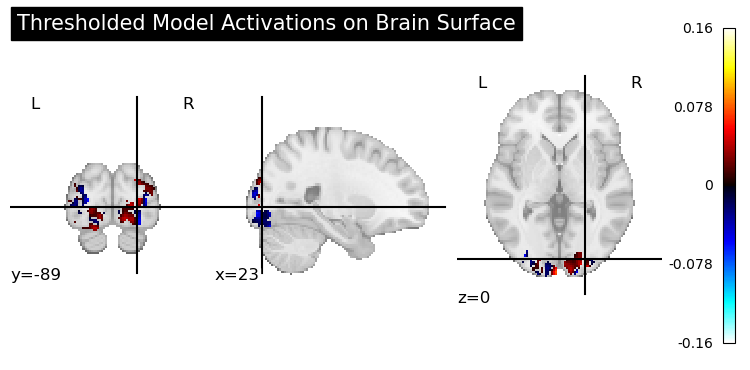

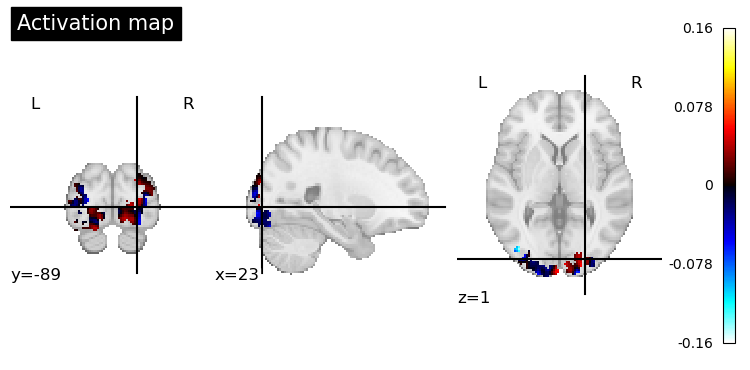

In [197]:
X_train,X_test,y_train,y_test=train_test_split(data_early_vis,Y,test_size=0.2,random_state=10)
model=SVC(kernel='linear')
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
coefs = model.coef_
threshold_value = check_threshold("95%", coefs, stats.scoreatpercentile)
coefs_r = np.sum(coefs, axis=0)
coefs_img = (maskers[0]).inverse_transform(coefs_r)
threshold_image = threshold_img(coefs_img, threshold=threshold_value)
plotting.plot_stat_map(threshold_image, title='Thresholded Model Activations on Brain Surface')
plotting.show()
plotting.plot_stat_map(coefs_img, title='Activation map', )
plotting.show()

#### LOC

0.5263157894736842


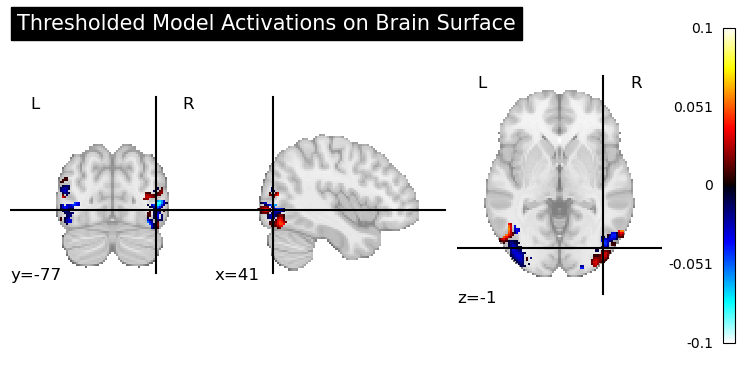

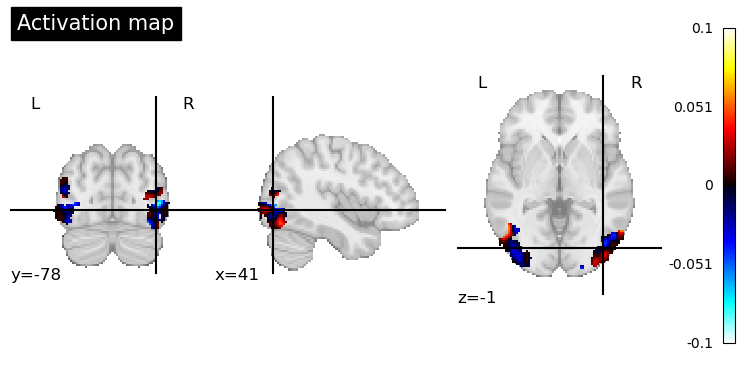

In [198]:
X_train,X_test,y_train,y_test=train_test_split(data_LOC,Y,test_size=0.2,random_state=10)
model=SVC(kernel='linear')
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
coefs = model.coef_
threshold_value = check_threshold("95%", coefs, stats.scoreatpercentile)
coefs_r = np.sum(coefs, axis=0)
coefs_img = (maskers[1]).inverse_transform(coefs_r)
threshold_image = threshold_img(coefs_img, threshold=threshold_value)
plotting.plot_stat_map(threshold_image, title='Thresholded Model Activations on Brain Surface')
plotting.show()
plotting.plot_stat_map(coefs_img, title='Activation map', )
plotting.show()

#### OPA

0.47368421052631576


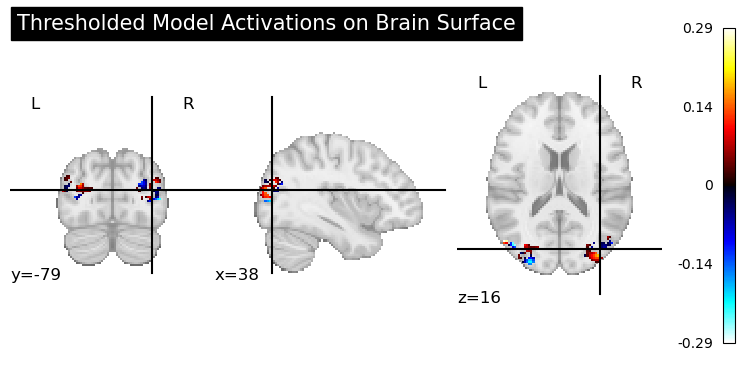

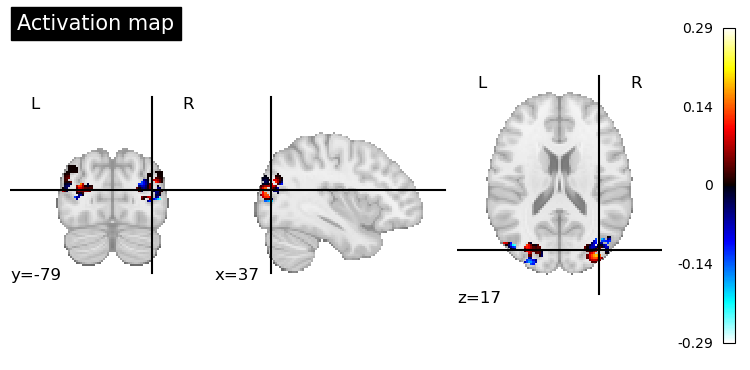

In [199]:
X_train,X_test,y_train,y_test=train_test_split(data_OPA,Y,test_size=0.2,random_state=10)
model=SVC(kernel='linear')
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
coefs = model.coef_
threshold_value = check_threshold("95%", coefs, stats.scoreatpercentile)
coefs_r = np.sum(coefs, axis=0)
coefs_img = (maskers[2]).inverse_transform(coefs_r)
threshold_image = threshold_img(coefs_img, threshold=threshold_value)
plotting.plot_stat_map(threshold_image, title='Thresholded Model Activations on Brain Surface')
plotting.show()
plotting.plot_stat_map(coefs_img, title='Activation map', )
plotting.show()

#### PPA

0.21052631578947367


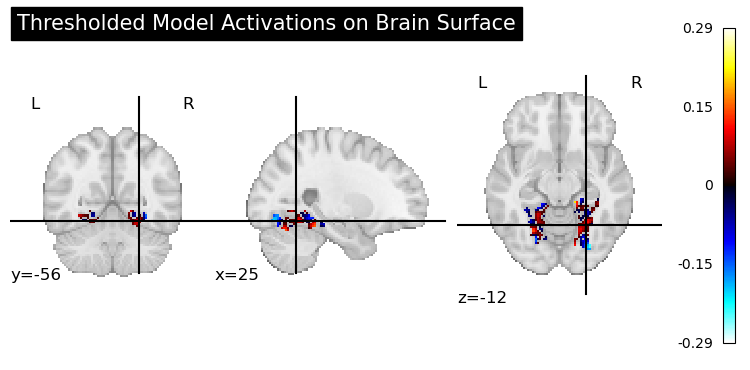

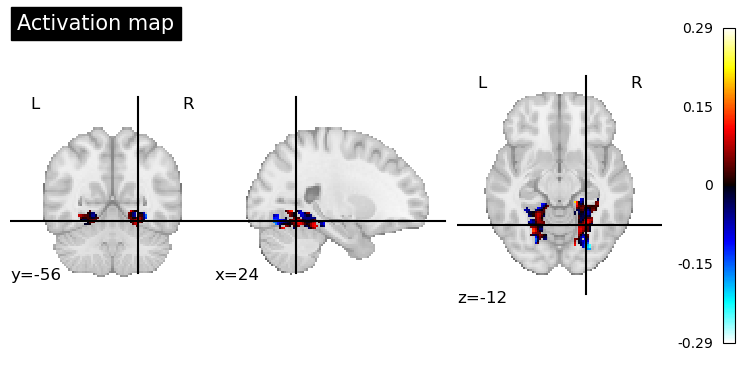

In [200]:
X_train,X_test,y_train,y_test=train_test_split(data_PPA,Y,test_size=0.2,random_state=10)
model=SVC(kernel='linear')
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
coefs = model.coef_
threshold_value = check_threshold("95%", coefs, stats.scoreatpercentile)
coefs_r = np.sum(coefs, axis=0)
coefs_img = (maskers[3]).inverse_transform(coefs_r)
threshold_image = threshold_img(coefs_img, threshold=threshold_value)
plotting.plot_stat_map(threshold_image, title='Thresholded Model Activations on Brain Surface')
plotting.show()
plotting.plot_stat_map(coefs_img, title='Activation map', )
plotting.show()

#### RSC

0.15789473684210525


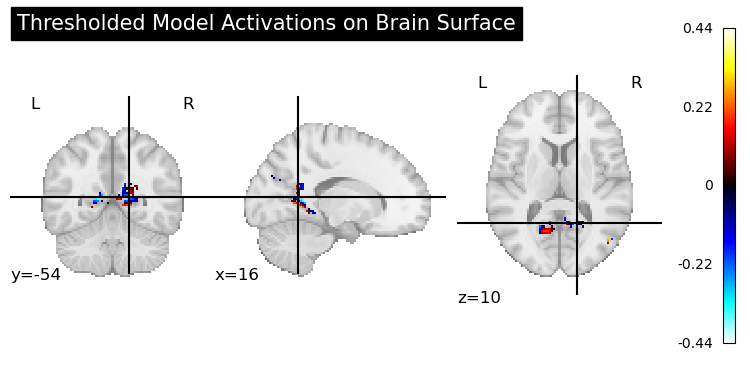

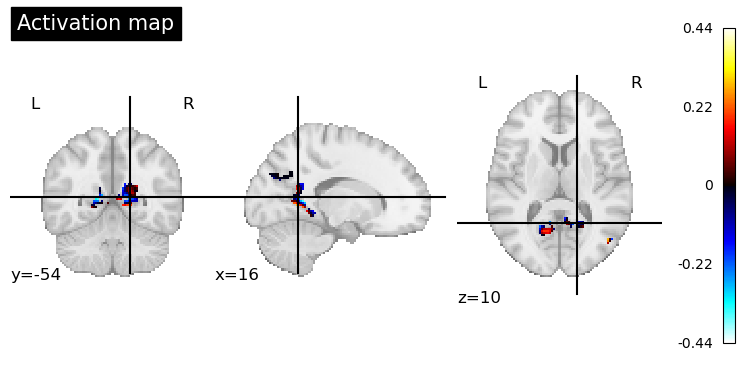

In [201]:
X_train,X_test,y_train,y_test=train_test_split(data_RSC,Y,test_size=0.2,random_state=10)
model=SVC(kernel='linear')
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
coefs = model.coef_
threshold_value = check_threshold("95%", coefs, stats.scoreatpercentile)
coefs_r = np.sum(coefs, axis=0)
coefs_img = (maskers[4]).inverse_transform(coefs_r)
threshold_image = threshold_img(coefs_img, threshold=threshold_value)
plotting.plot_stat_map(threshold_image, title='Thresholded Model Activations on Brain Surface')
plotting.show()
plotting.plot_stat_map(coefs_img, title='Activation map', )
plotting.show()

## Plotting category specific brain activations using classifier weights to analyze the overlapping patterns of weights corresponding to the given ROIs for each of the categories in the multi-class classification problem framework

ROI: Early Visual, Category: artificial inanimate One-vs-Rest Accuracy: 0.631578947368421


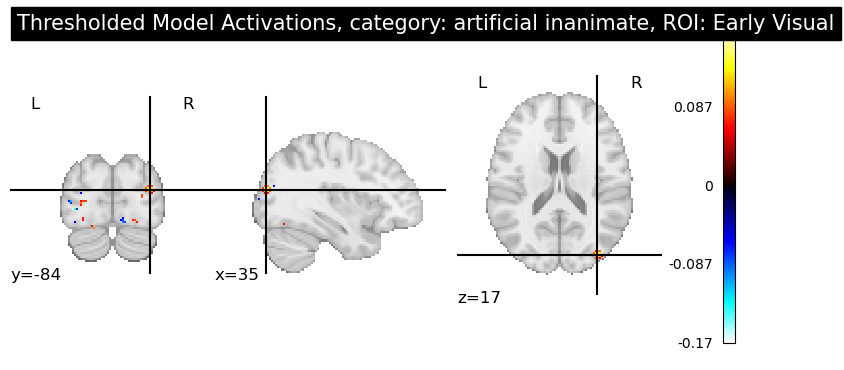

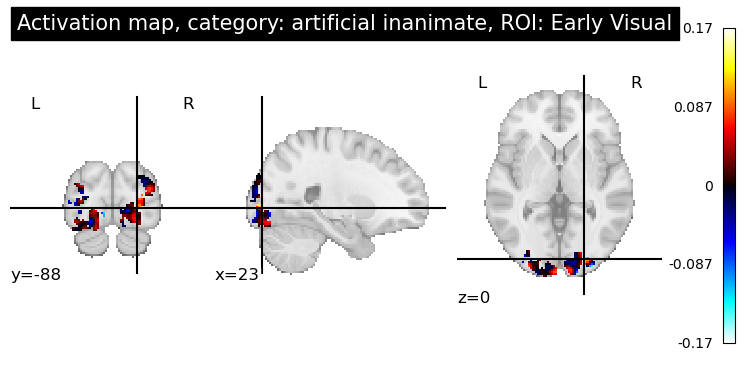

ROI: LOC, Category: artificial inanimate One-vs-Rest Accuracy: 0.7894736842105263


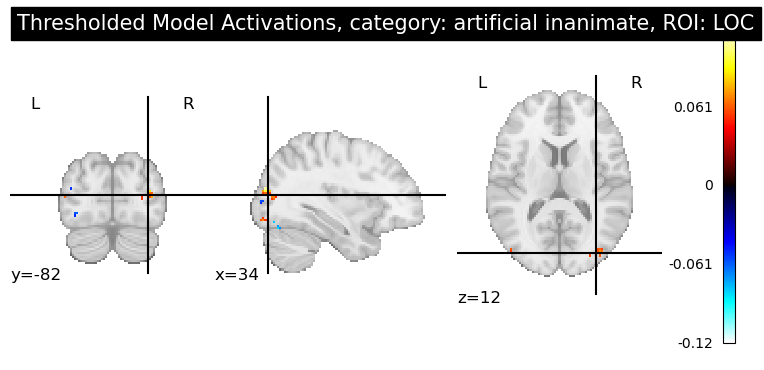

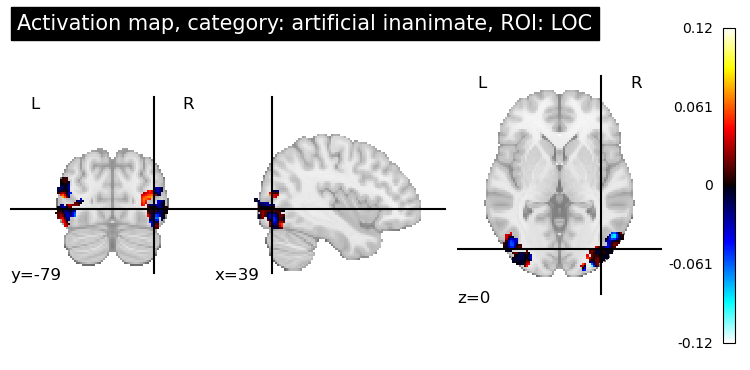

ROI: OPA, Category: artificial inanimate One-vs-Rest Accuracy: 0.7894736842105263


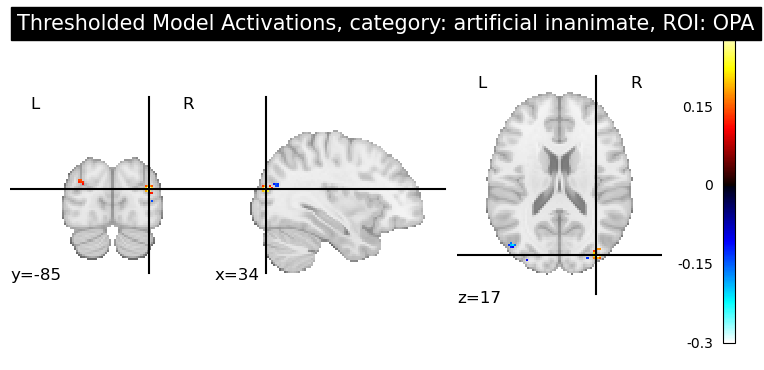

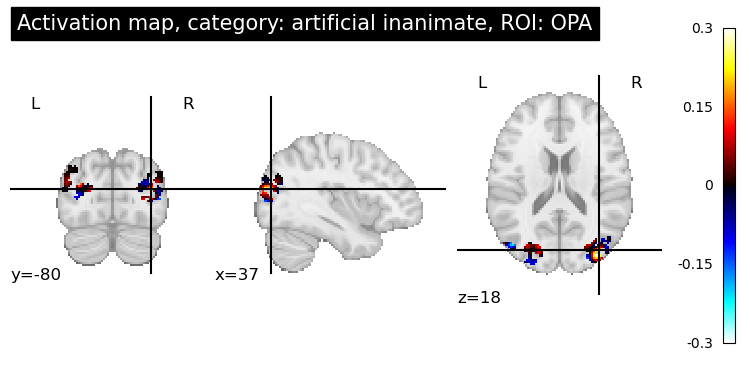

ROI: PPA, Category: artificial inanimate One-vs-Rest Accuracy: 0.8421052631578947


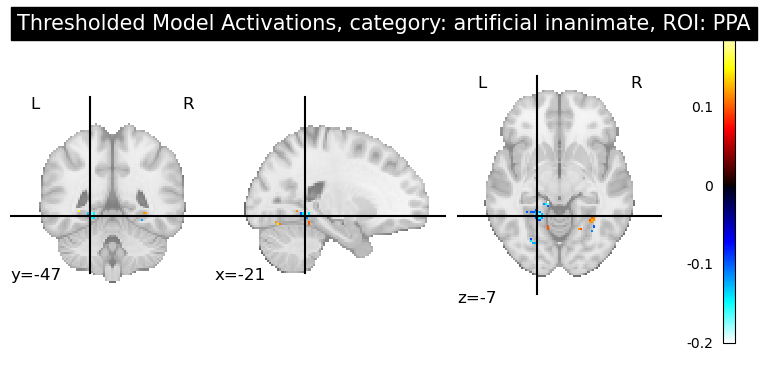

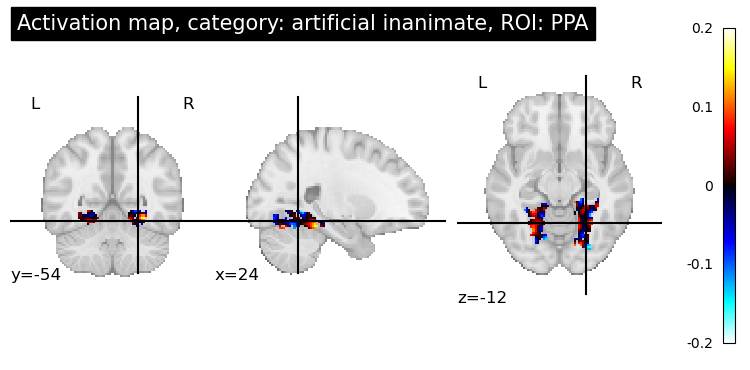

ROI: RSC, Category: artificial inanimate One-vs-Rest Accuracy: 0.7368421052631579


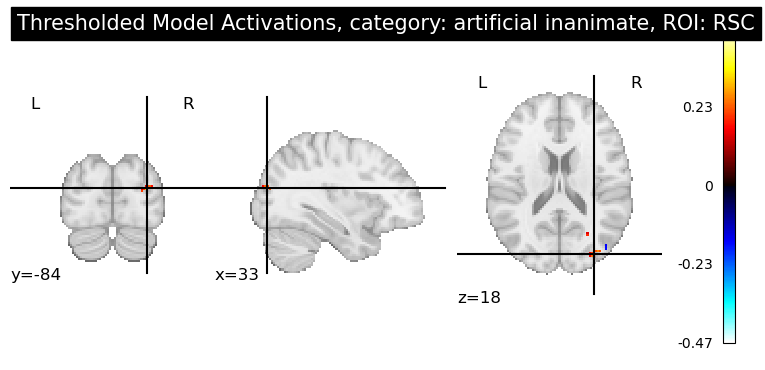

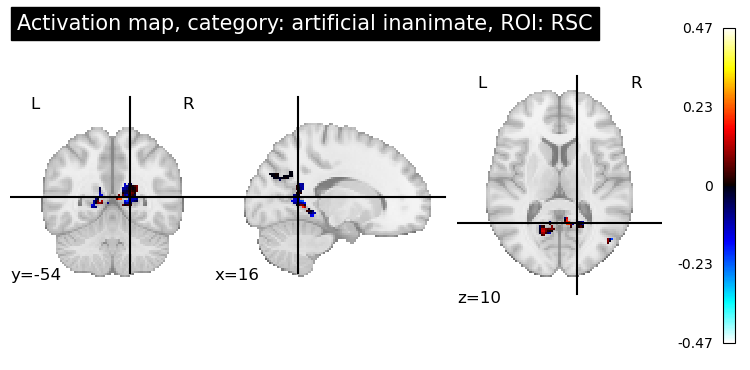

ROI: Early Visual, Category: human bodypart One-vs-Rest Accuracy: 0.8947368421052632


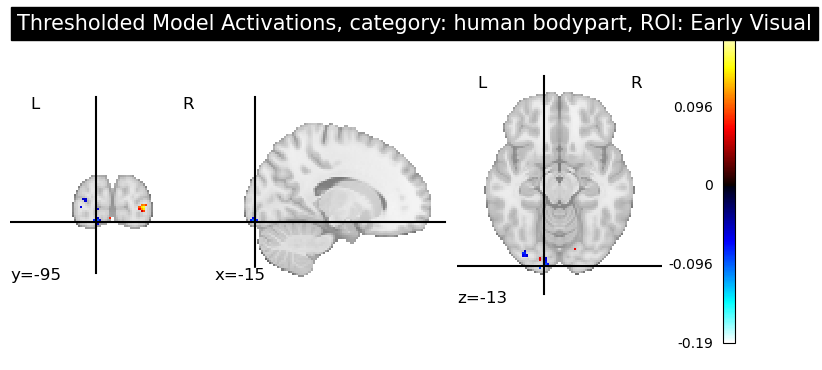

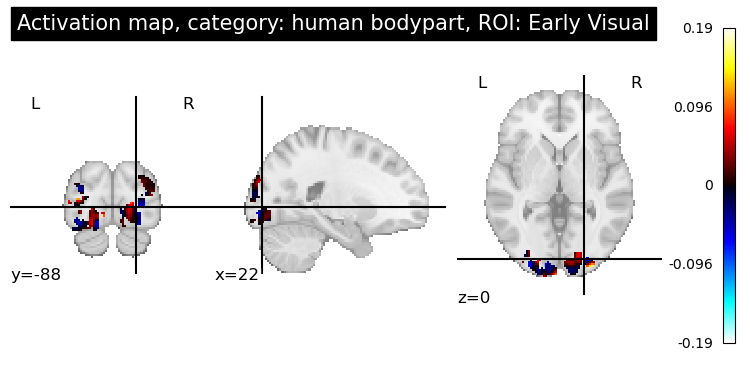

ROI: LOC, Category: human bodypart One-vs-Rest Accuracy: 0.8421052631578947


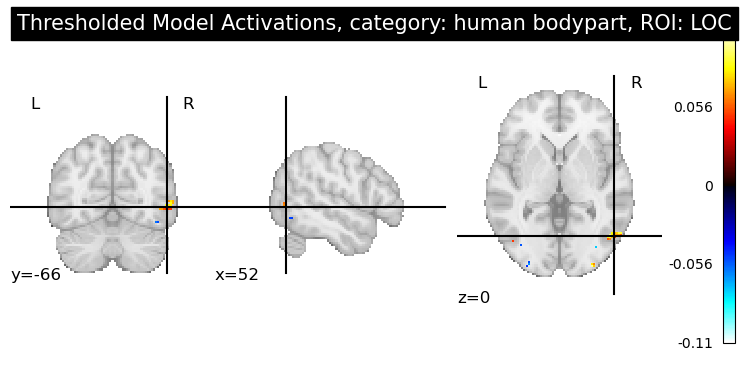

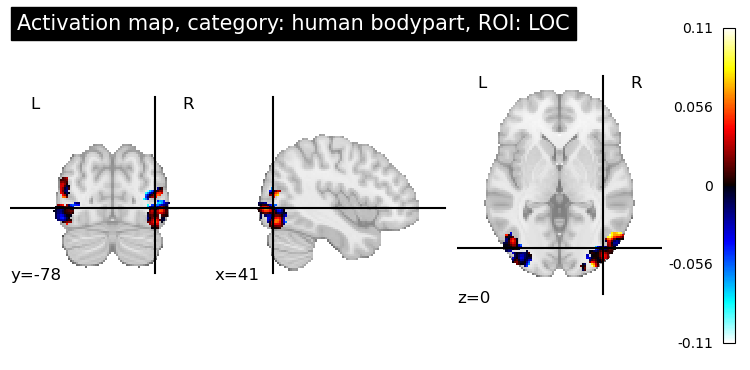

ROI: OPA, Category: human bodypart One-vs-Rest Accuracy: 0.8947368421052632


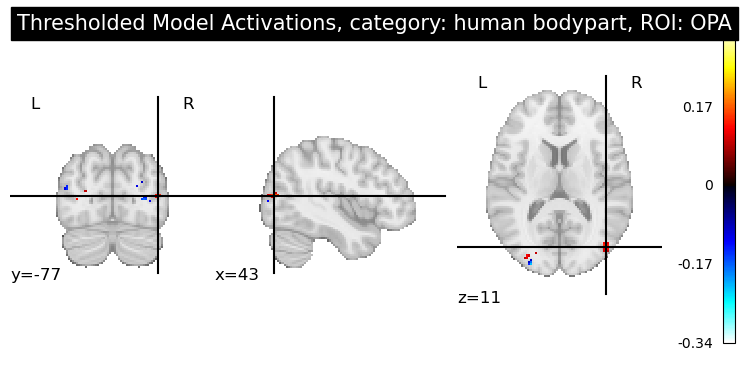

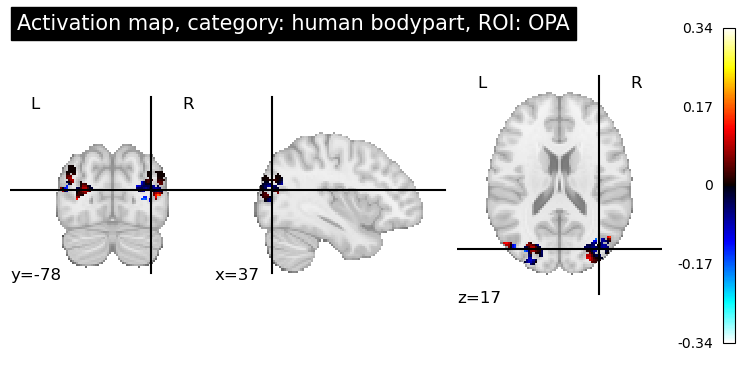

ROI: PPA, Category: human bodypart One-vs-Rest Accuracy: 0.8947368421052632


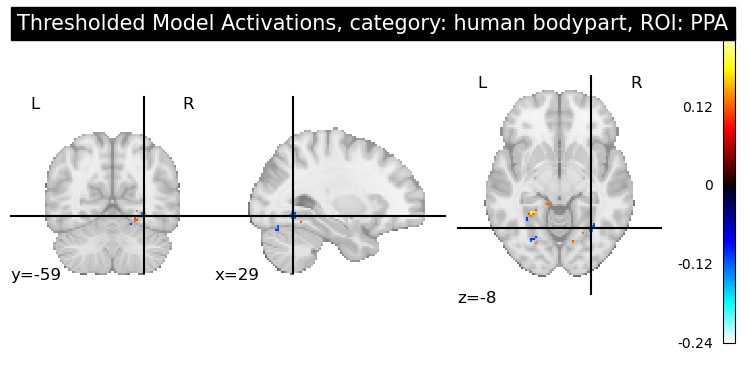

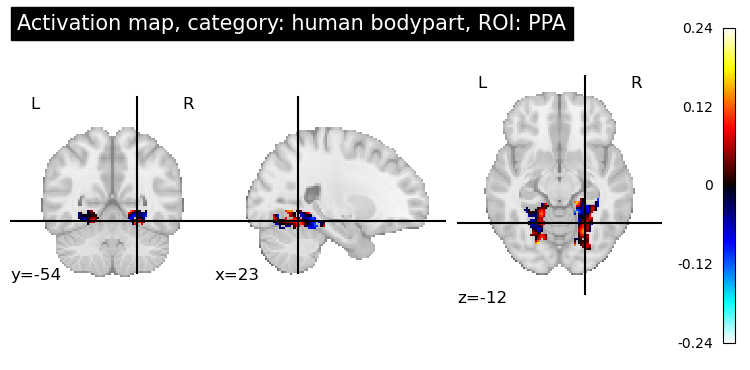

ROI: RSC, Category: human bodypart One-vs-Rest Accuracy: 0.7894736842105263


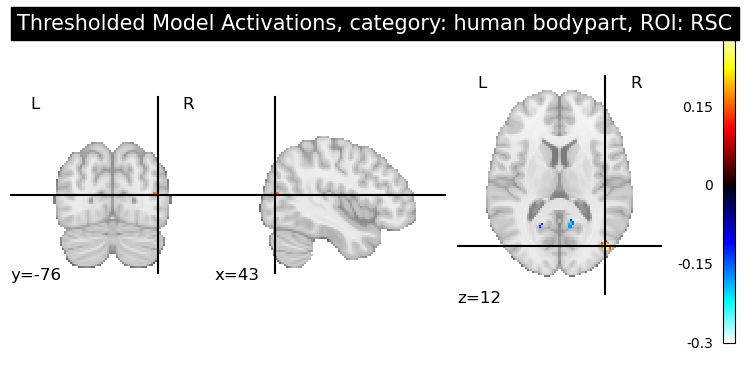

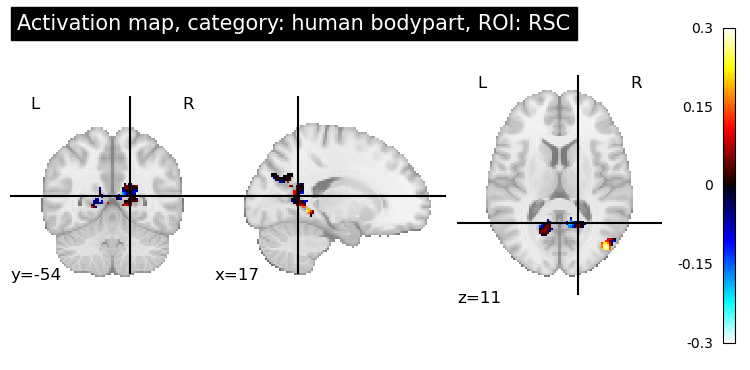

ROI: Early Visual, Category: human face One-vs-Rest Accuracy: 0.8947368421052632


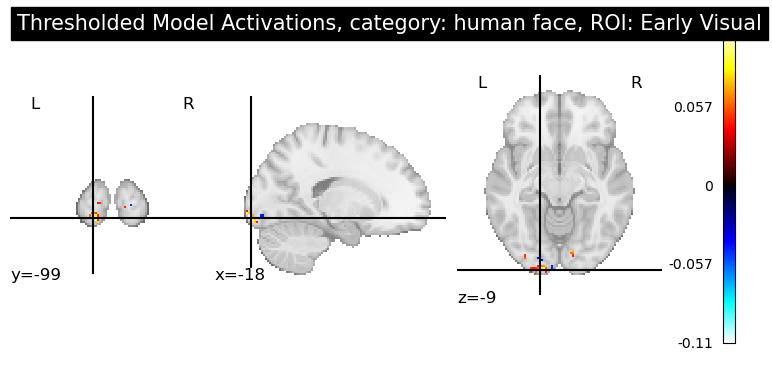

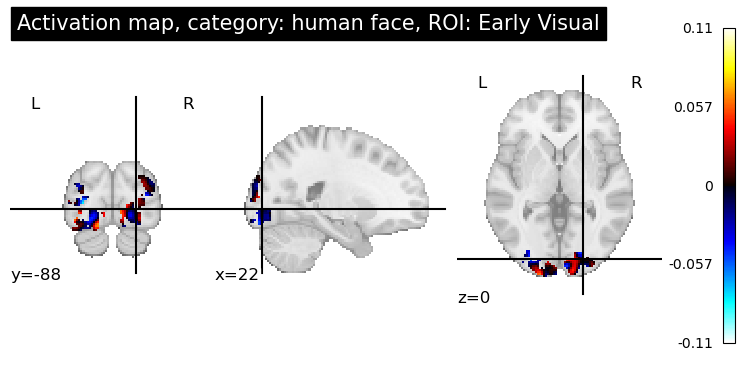

ROI: LOC, Category: human face One-vs-Rest Accuracy: 0.8947368421052632


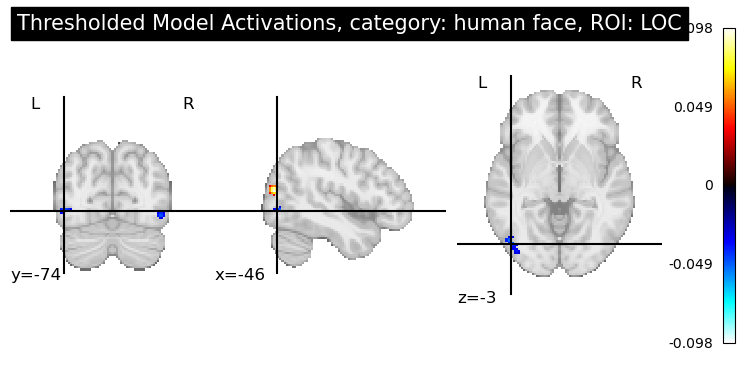

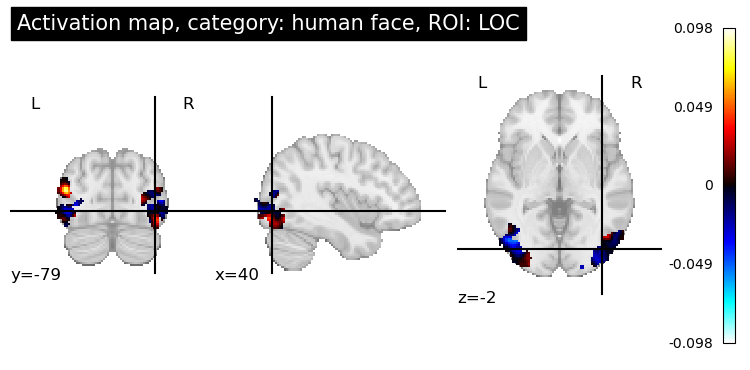

ROI: OPA, Category: human face One-vs-Rest Accuracy: 0.8947368421052632


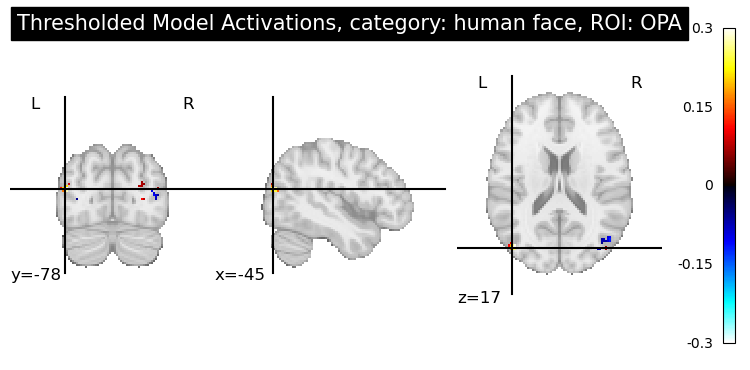

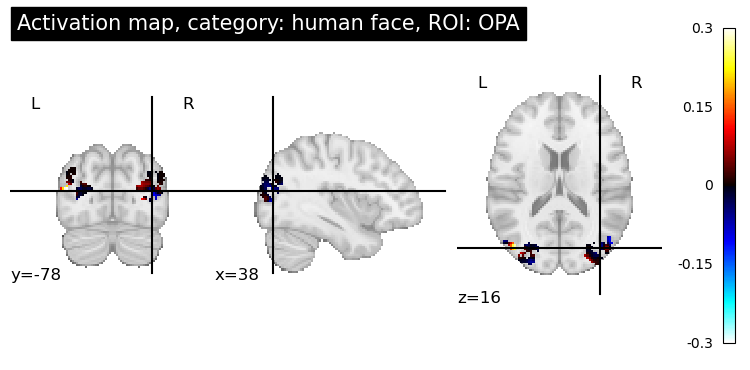

ROI: PPA, Category: human face One-vs-Rest Accuracy: 0.8947368421052632


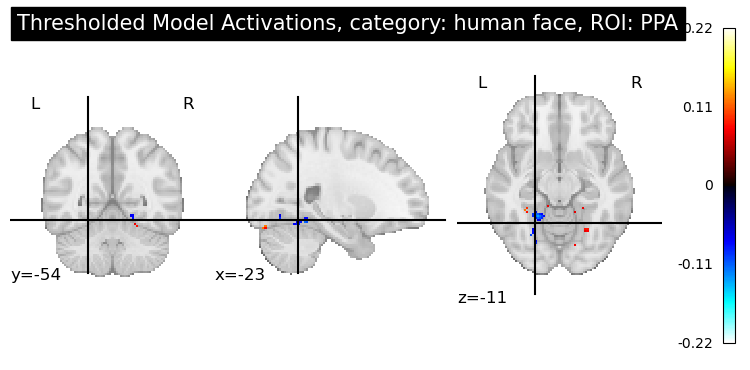

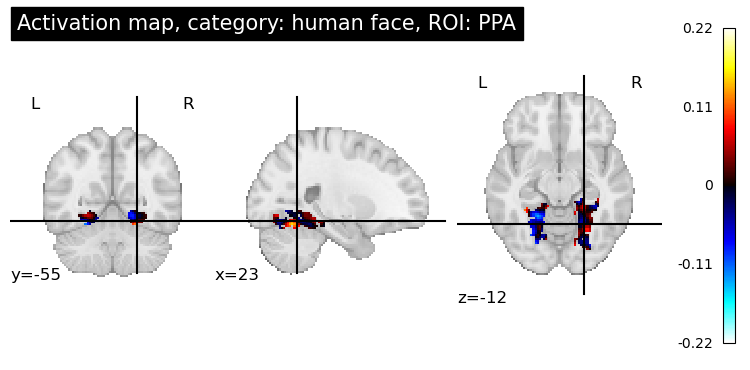

ROI: RSC, Category: human face One-vs-Rest Accuracy: 0.8947368421052632


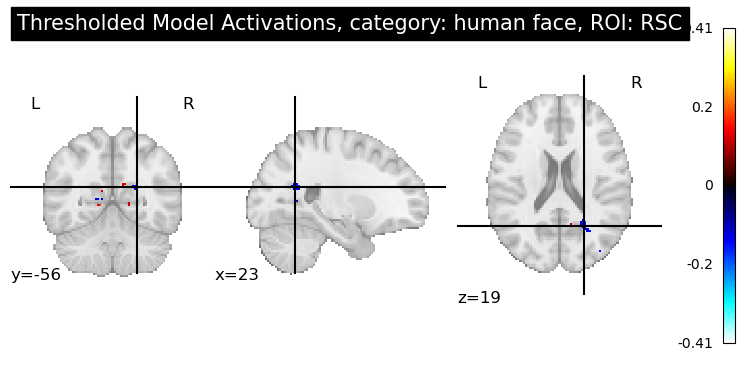

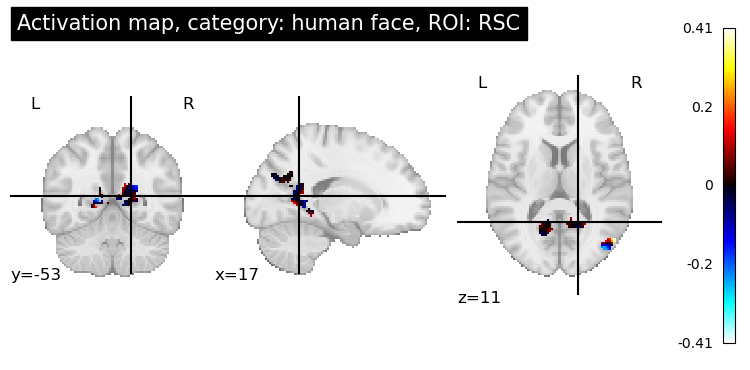

ROI: Early Visual, Category: natural inanimate One-vs-Rest Accuracy: 0.6842105263157895


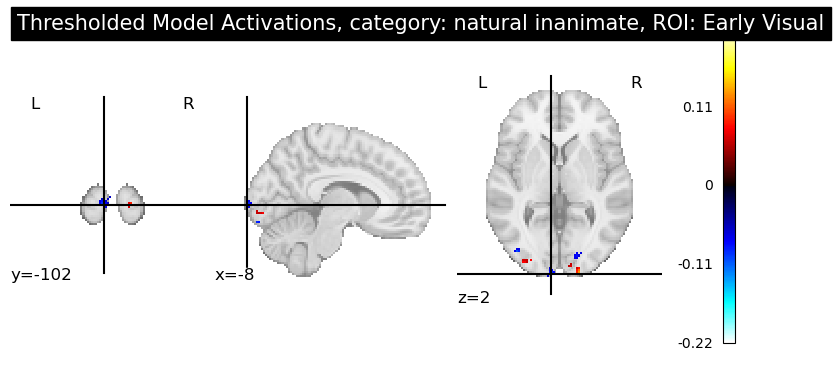

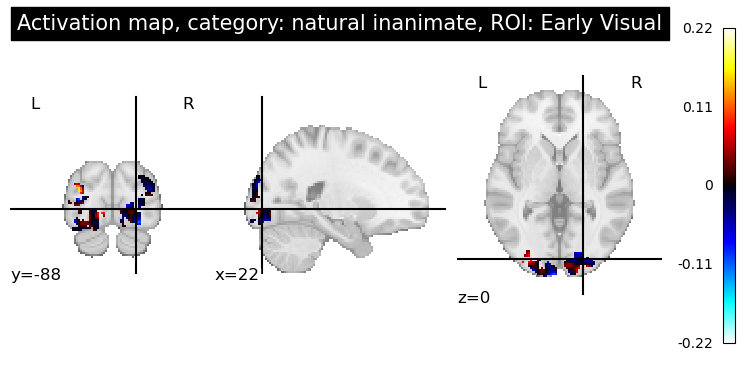

ROI: LOC, Category: natural inanimate One-vs-Rest Accuracy: 0.8947368421052632


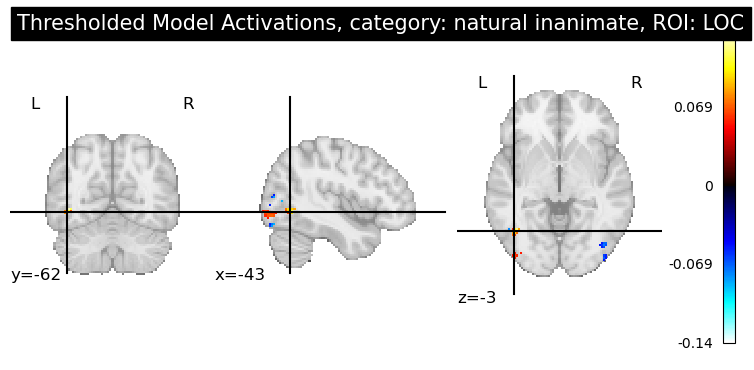

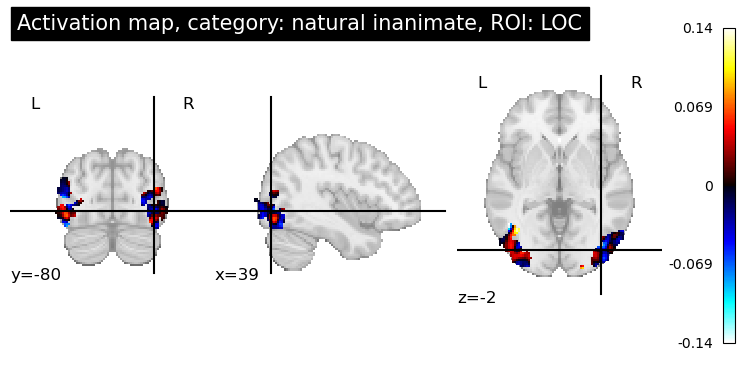

ROI: OPA, Category: natural inanimate One-vs-Rest Accuracy: 0.7894736842105263


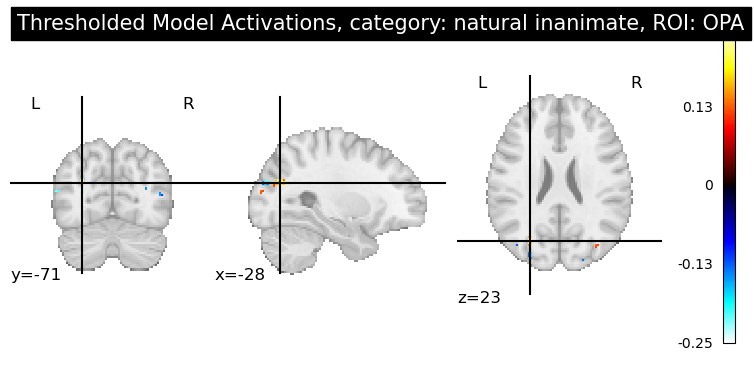

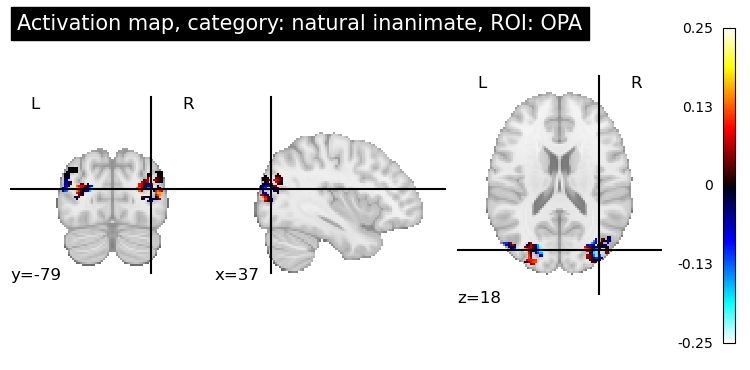

ROI: PPA, Category: natural inanimate One-vs-Rest Accuracy: 0.6842105263157895


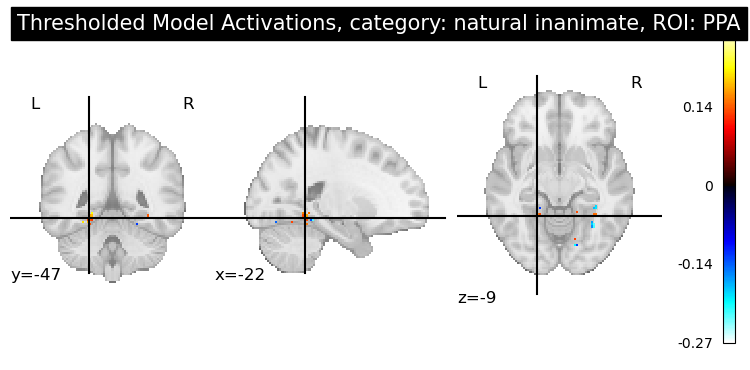

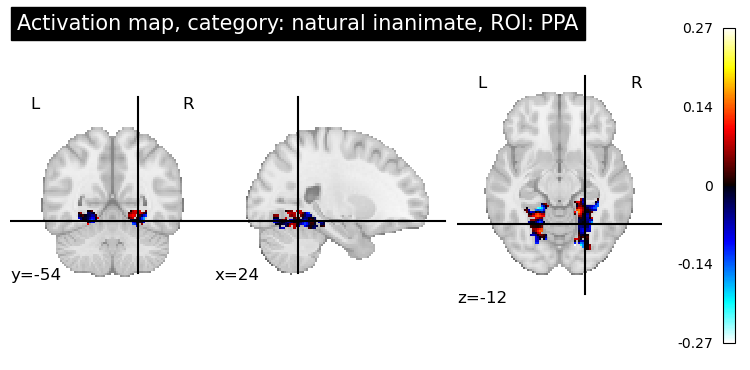

ROI: RSC, Category: natural inanimate One-vs-Rest Accuracy: 0.6842105263157895


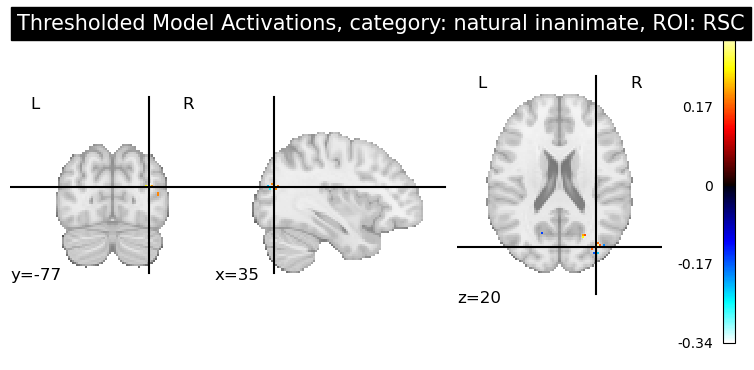

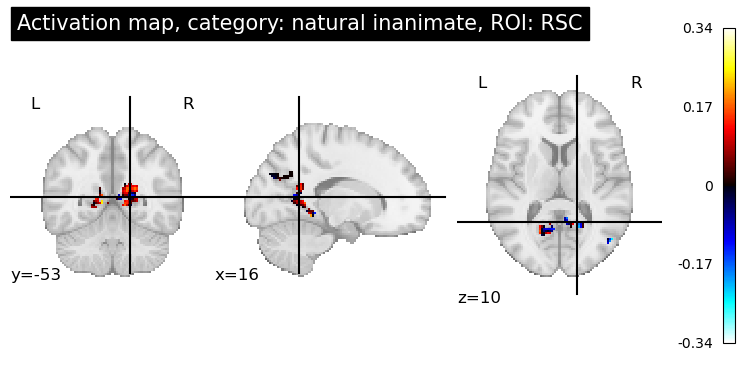

ROI: Early Visual, Category: nonhuman bodypart One-vs-Rest Accuracy: 0.7368421052631579


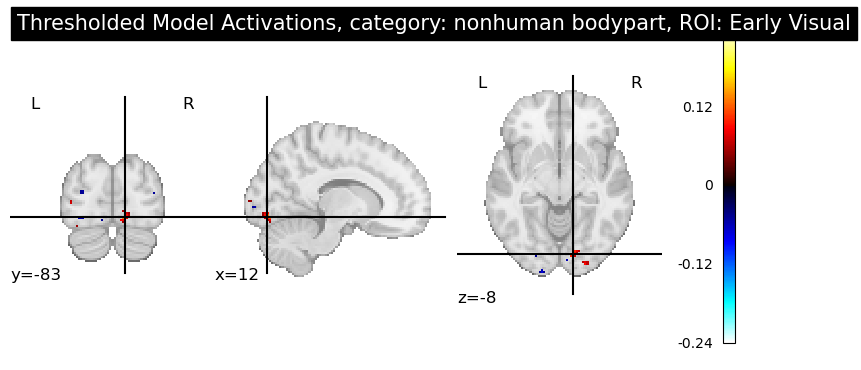

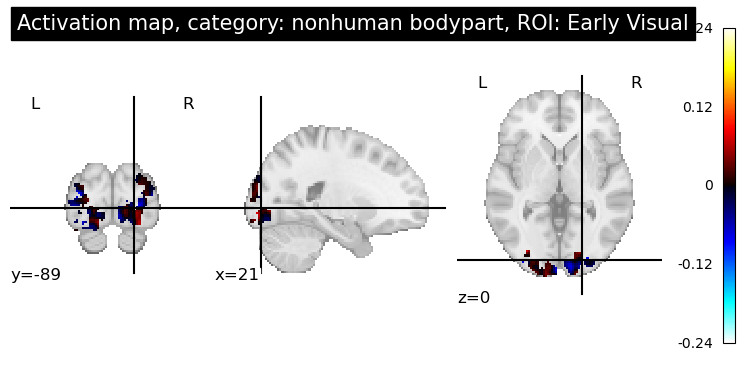

ROI: LOC, Category: nonhuman bodypart One-vs-Rest Accuracy: 0.7894736842105263


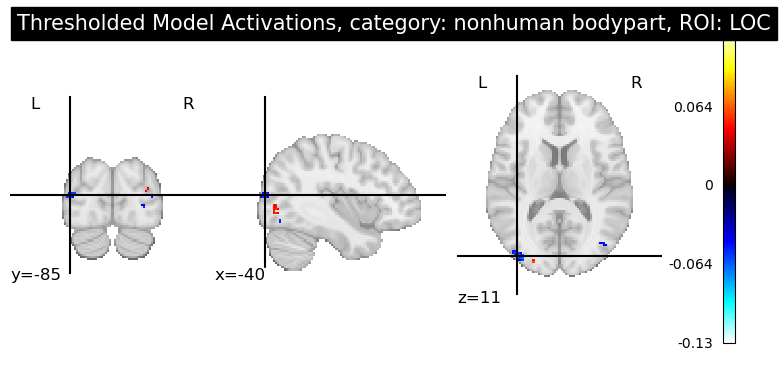

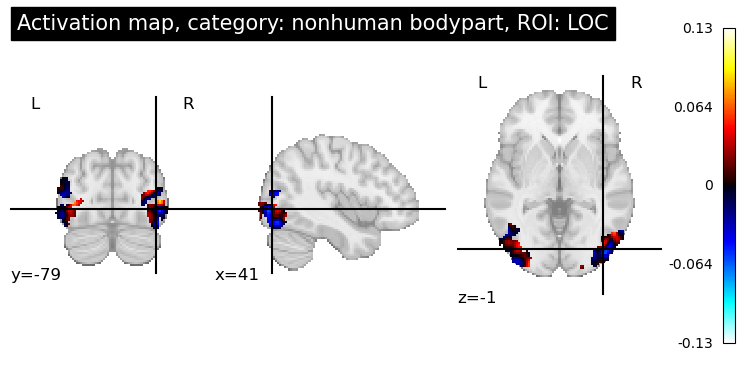

ROI: OPA, Category: nonhuman bodypart One-vs-Rest Accuracy: 0.8421052631578947


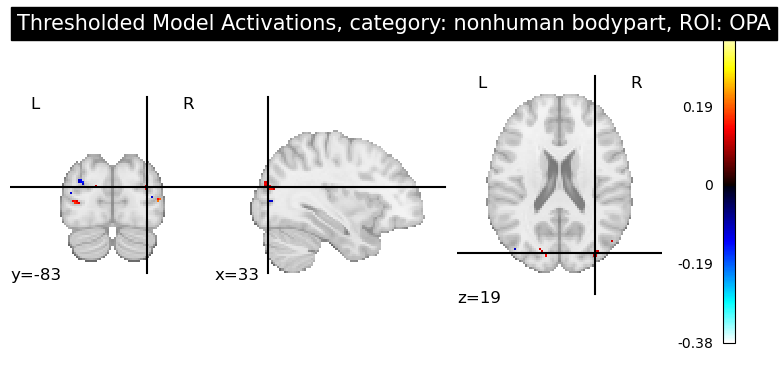

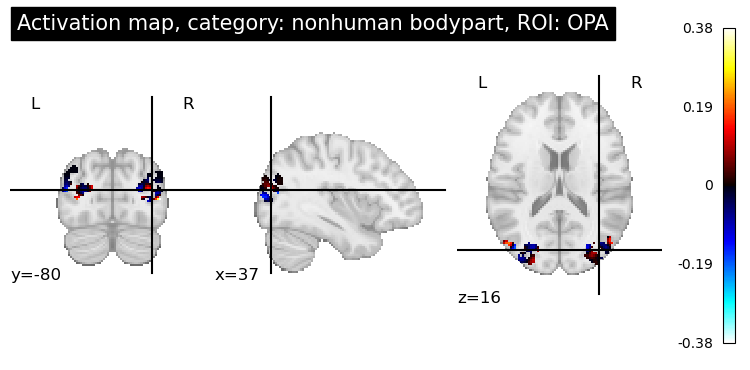

ROI: PPA, Category: nonhuman bodypart One-vs-Rest Accuracy: 0.8421052631578947


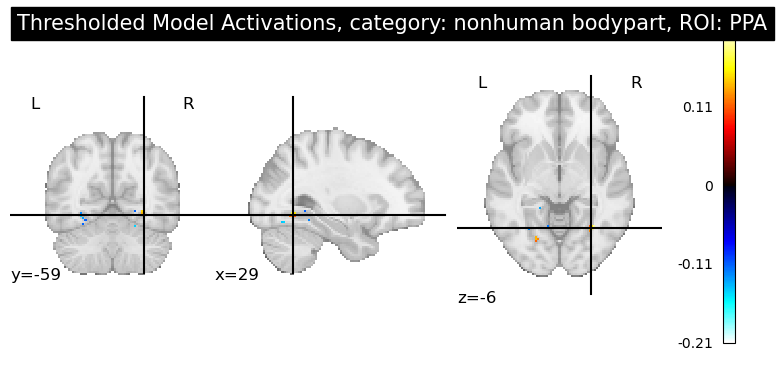

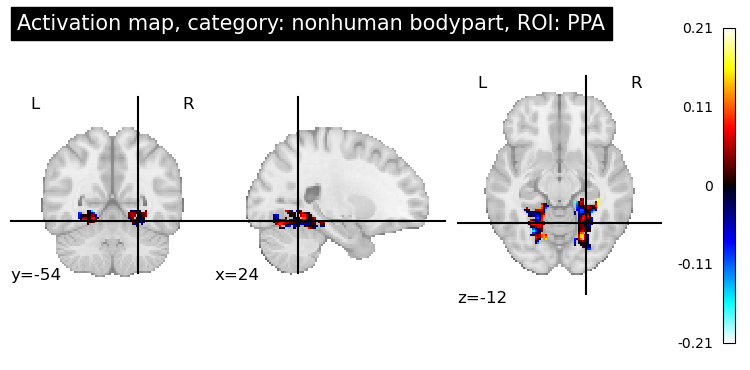

ROI: RSC, Category: nonhuman bodypart One-vs-Rest Accuracy: 0.8421052631578947


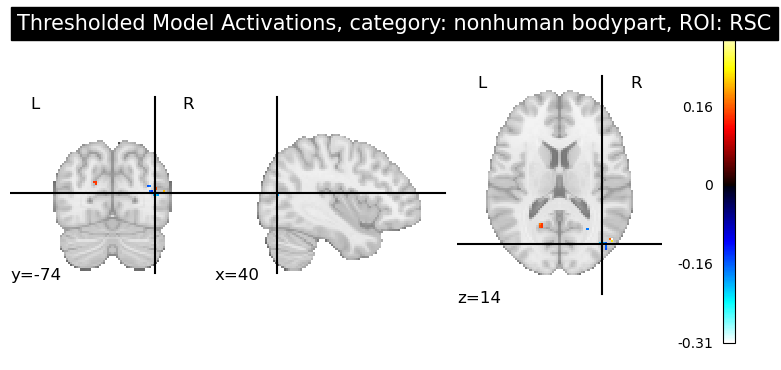

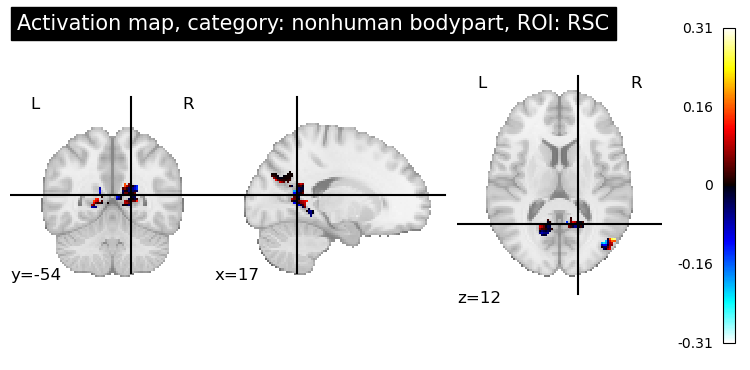

ROI: Early Visual, Category: nonhuman face One-vs-Rest Accuracy: 0.7368421052631579


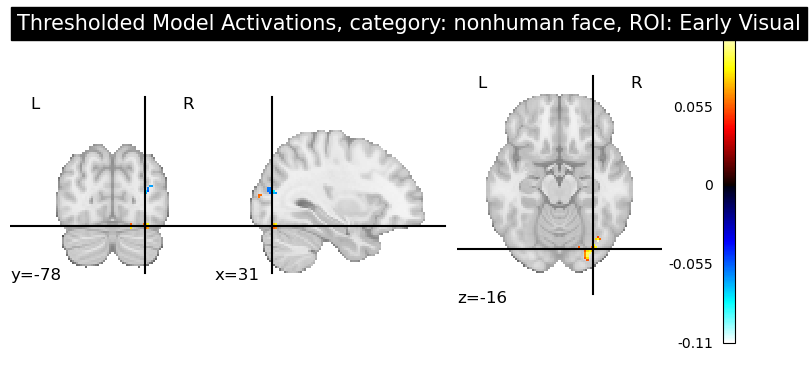

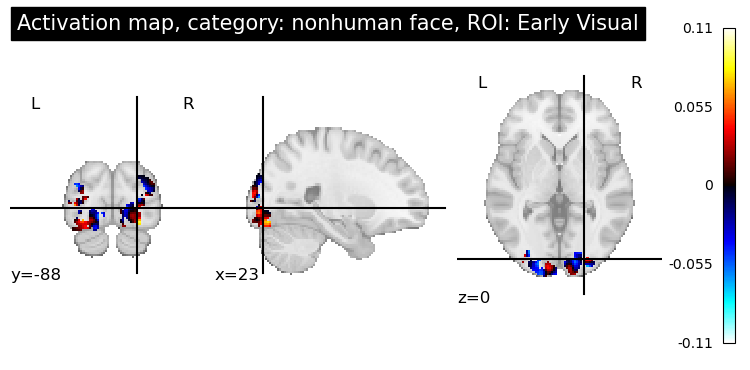

ROI: LOC, Category: nonhuman face One-vs-Rest Accuracy: 0.8421052631578947


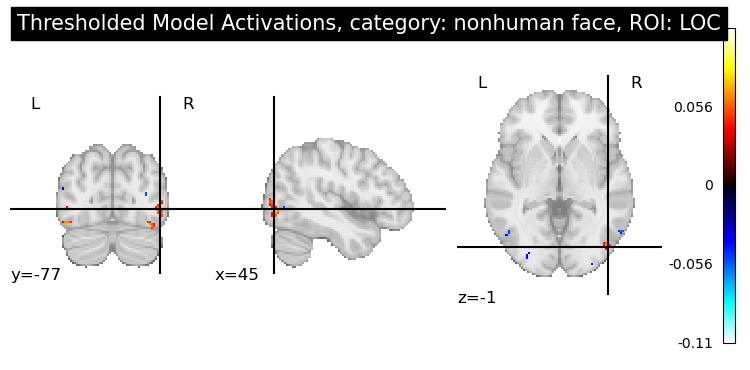

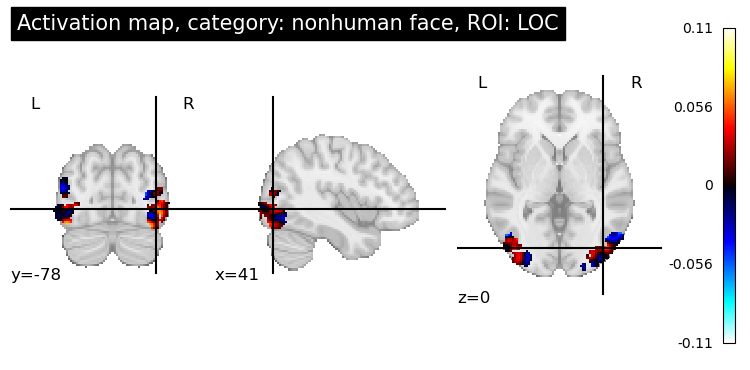

ROI: OPA, Category: nonhuman face One-vs-Rest Accuracy: 0.8947368421052632


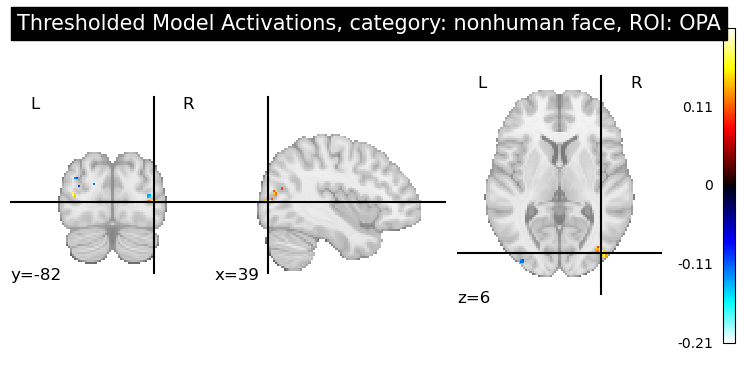

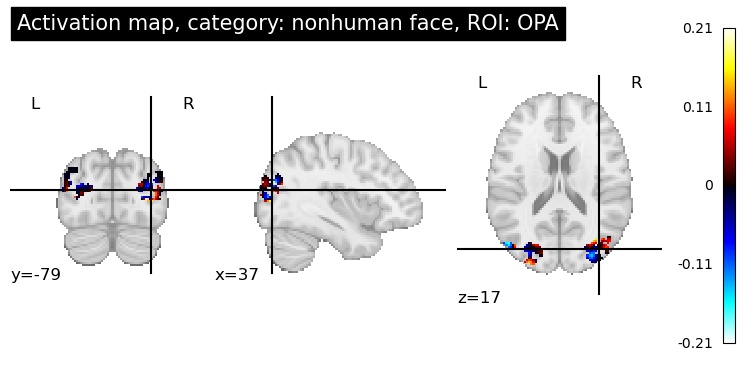

ROI: PPA, Category: nonhuman face One-vs-Rest Accuracy: 0.7894736842105263


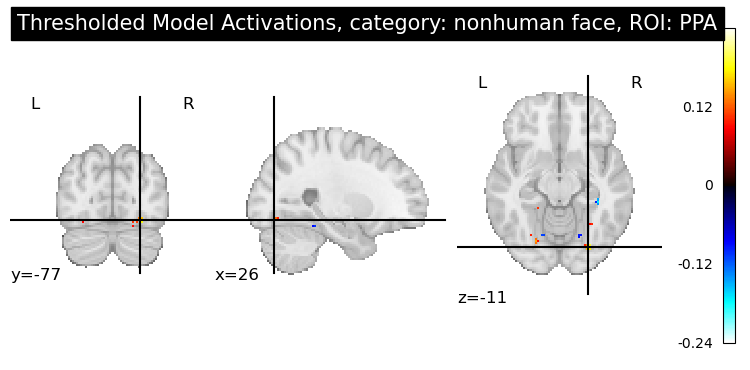

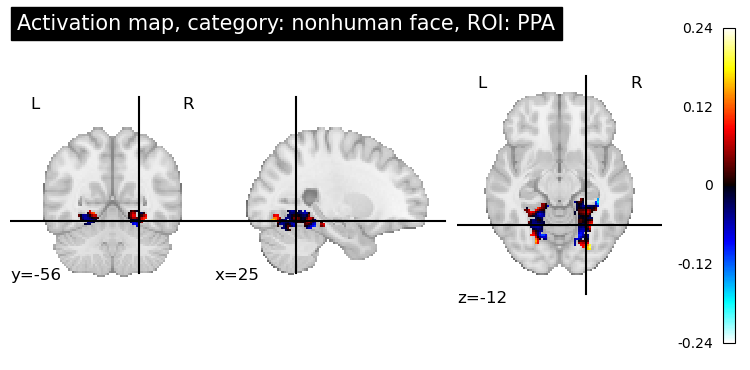

ROI: RSC, Category: nonhuman face One-vs-Rest Accuracy: 0.7368421052631579


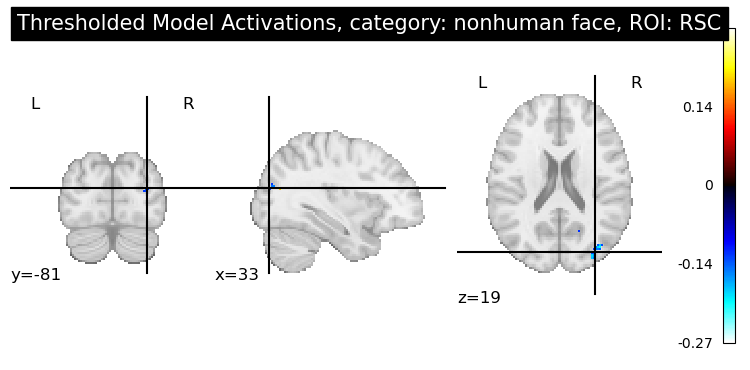

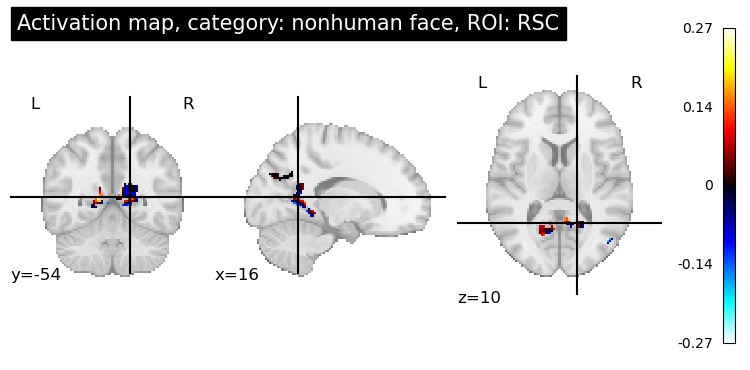

In [202]:
i=0
for cl in class_labels:
    i=0
    for dt in region_data:
        X_train,X_test,y_train,y_test=train_test_split(dt,Y,test_size=0.2,random_state=10)
        y_temp=[int(x) for x in (y_train==cl)]
        y_test_temp=[int(x) for x in (y_test==cl)]
        clf = LogisticRegression(multi_class='ovr')
        clf.fit(X_train, y_temp)
        y_pred = clf.predict(X_test)
        print(f'ROI: {int_to_ROI[i]}, Category: {label_mapping[cl]} One-vs-Rest Accuracy: {accuracy_score(y_test_temp,y_pred)}')
        coefs=clf.coef_
        threshold_value = check_threshold("95%", coefs, stats.scoreatpercentile)
        coefs_img = (maskers[i]).inverse_transform(coefs)
        threshold_image = threshold_img(coefs_img, threshold=threshold_value)
        plotting.plot_stat_map(threshold_image, title=f'Thresholded Model Activations, category: {label_mapping[cl]}, ROI: {int_to_ROI[i]}')
        plotting.show()
        plotting.plot_stat_map(coefs_img, title=f'Activation map, category: {label_mapping[cl]}, ROI: {int_to_ROI[i]}')
        plotting.show()
        i+=1